<center>

# **LAB 1: DATA RELATIONSHIP** 

</center>

<center>

# **Mục lục** <a name = "TOC"></a>

</center>

- [1. Giới thiệu thành viên](#section1)
- [2. Các thư viện sử dụng](#section2)
- [3. Mô tả dữ liệu](#section3)
- [4. Giới thiệu thuộc tính và ý nghĩa](#section4)
- [5. Xử lý dữ liệu](#section5)
    - [5.1. Đọc dữ liệu vào Dataframe](#section5_1)
    - [5.2. Số dòng và số cột của tập dữ liệu](#section5_2)
    - [5.3. Ý nghĩa của mỗi dòng](#section5_3)
    - [5.4. Kiểm tra các dòng bị trùng lắp](#section5_4)
    - [5.5. Ý nghĩa của mỗi cột](#section5_5)
    - [5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp](#section5_6)
    - [5.7. Tìm sự phân phối của các cột dữ liệu kiểu số](#section5_7)
    - [5.8. Tìm sự phân phối của các cột dữ liệu phân loại](#section5_8)
    - [5.9. Xử lý các dòng bị thiếu dữ liệu](#section5_9)
- [6. Phân tích dữ liệu](#section6)
    - [6.1. Câu hỏi số 1](#section6_1)
    - [6.2. Câu hỏi số 2](#section6_2)
    - [6.3. Câu hỏi số 3](#section6_3)
    - [6.4. Câu hỏi số 4](#section6_4)
    - [6.5. Câu hỏi số 4](#section6_5)
- [7. Đôi điều về đồ án](#section7)
- [8. Các nguồn tham khảo](#section8)

# **1. Giới thiệu thành viên** <a name = "section1"></a>
[Quay về mục lục](#TOC)

---

# **2. Các thư viện sử dụng** <a name = "section2"></a>
[Quay về mục lục](#TOC)

In [221]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

---

# **3. Mô tả dữ liệu** <a name = "section3"></a>
[Quay về mục lục](#TOC)

---

# **4. Giới thiệu thuộc tính và ý nghĩa** <a name = "section4"></a>
[Quay về mục lục](#TOC)

---

# **5. Xử lý dữ liệu** <a name = "section5"></a>
[Quay về mục lục](#TOC)

## 5.1. Đọc dữ liệu vào Dataframe <a name = "section5_1"></a>
[Quay về mục lục](#TOC)

In [222]:
covid19_df = pd.read_csv('covid19_05_03_2023.csv')
covid19_df.head()

,index,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,NaN,\r\nNorth America\r\n,"124,725,126",NaN,"1,612,592",NaN,"120,021,937","+1,529","3,090,597","7,892",...,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN
1,NaN,\r\nAsia\r\n,"214,494,303","+19,555","1,537,456",125.0,"199,126,511","+17,607","13,830,336","15,479",...,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN
2,NaN,\r\nEurope\r\n,"246,578,283","+18,461","2,019,397",48.0,"242,121,931","+24,102","2,436,955","6,475",...,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN
3,NaN,\r\nSouth America\r\n,"68,046,073",+167,"1,350,933",8.0,"66,293,956",+111,"401,184","10,185",...,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN
4,NaN,\r\nOceania\r\n,"14,015,805",NaN,"26,203",NaN,"13,852,354",NaN,"137,248",55,...,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN


In [223]:
def preprocess(df):
    df.drop(columns=df.columns[0], axis=1,  inplace=True)
    df['country_other'] = df['country_other'].str.strip()
    df = df[df['country_other']!='']
    df_ = df.copy()
    df_.replace(to_replace = r'\D',value = '',regex=True,inplace = True)
    df_.iloc[:,0] = df.iloc[:,0]
    df_['continent'] = df['continent']
    return df_

In [224]:
covid19_df = preprocess(covid19_df)
covid19_df['continent']

0          North America
1                   Asia
2                 Europe
3          South America
4      Australia/Oceania
             ...        
242        South America
243    Australia/Oceania
244               Africa
245                  NaN
246                  All
Name: continent, Length: 246, dtype: object

## 5.2. Số dòng và số cột của tập dữ liệu <a name = "section5_2"></a>
[Quay về mục lục](#TOC)

In [225]:
row = covid19_df.shape[0]
col = covid19_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)

Số dòng: 246
Số cột 21


## 5.3. Ý nghĩa của mỗi dòng <a name = "section5_3"></a>
[Quay về mục lục](#TOC)

## 5.4. Kiểm tra các dòng bị trùng lắp <a name = "section5_4"></a>
[Quay về mục lục](#TOC)

In [226]:
duplicated = covid19_df.duplicated()
pd.DataFrame(covid19_df[duplicated==True])

,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,tot_cases_1m_pop,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop


## 5.5. Ý nghĩa của mỗi cột <a name = "section5_5"></a>
[Quay về mục lục](#TOC)

## 5.6. Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp <a name = "section5_6"></a>
[Quay về mục lục](#TOC)

In [227]:
covid19_df.dtypes

country_other           object
totalcases              object
newcases                object
totaldeaths             object
newdeaths              float64
totalrecovered          object
newrecovered            object
activecases             object
serious_critical        object
tot_cases_1m_pop        object
deaths_1m_pop           object
totaltests              object
tests_1m_pop            object
population              object
continent               object
1_caseevery_x_ppl       object
1_deathevery_x_ppl      object
1_testevery_x_ppl      float64
new_cases_1m_pop       float64
new_deaths_1m_pop      float64
active_cases_1m_pop     object
dtype: object

## 5.7. Tìm sự phân phối của các cột dữ liệu kiểu số <a name = "section5_7"></a>
[Quay về mục lục](#TOC)

## 5.8. Tìm sự phân phối của các cột dữ liệu phân loại <a name = "section5_8"></a>
[Quay về mục lục](#TOC)

## 5.9. Xử lý các dòng bị thiếu dữ liệu <a name = "section5_9"></a>
[Quay về mục lục](#TOC)

---

# **6. Phân tích dữ liệu** <a name = "section6"></a>
[Quay về mục lục](#TOC)

## 6.1. Câu hỏi số 1 <a name = "section6_1"></a>
[Quay về mục lục](#TOC)

## 6.2. Câu hỏi số 2 <a name = "section6_2"></a>
[Quay về mục lục](#TOC)

## 6.3. Câu hỏi số 3 <a name = "section6_3"></a>
[Quay về mục lục](#TOC)

## 6.4. Câu hỏi số 4 <a name = "section6_4"></a>
[Quay về mục lục](#TOC)

- Trước tiên lựa chọn những hàng cần thiết để có thể vẽ donut chart. Ở đây ta sẽ chọn những cột 'continent','totaldeaths','totalrecovered','activecases', 'totalcases' vì biểu đồ diễn tả mối quan hệ thành phần tác động đến tổng thể dữ liệu và ép kiểu cho phù hợp.

In [228]:

df = covid19_df[covid19_df['country_other'] == 'Total:'].reset_index()
df['totalcases'] = df['totalcases'].astype('float')
df['totaldeaths'] = df['totaldeaths'].astype('float')
df['totalrecovered'] = df['totalrecovered'].astype('float')
df['activecases'] = df['activecases'].astype('float')
df

,index,country_other,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,...,totaltests,tests_1m_pop,population,continent,1_caseevery_x_ppl,1_deathevery_x_ppl,1_testevery_x_ppl,new_cases_1m_pop,new_deaths_1m_pop,active_cases_1m_pop
0,239,Total:,124725126.0,NaN,1612592.0,NaN,120021937.0,NaN,3090597.0,7892,...,NaN,NaN,NaN,North America,,NaN,NaN,NaN,NaN,NaN
1,240,Total:,214494303.0,19555,1537456.0,125.0,199126511.0,17607,13830336.0,15479,...,NaN,NaN,NaN,Asia,,NaN,NaN,NaN,NaN,NaN
2,241,Total:,246578283.0,18461,2019397.0,48.0,242121931.0,24102,2436955.0,6475,...,NaN,NaN,NaN,Europe,,NaN,NaN,NaN,NaN,NaN
3,242,Total:,68046073.0,167,1350933.0,8.0,66293956.0,111,401184.0,10185,...,NaN,NaN,NaN,South America,,NaN,NaN,NaN,NaN,NaN
4,243,Total:,14015805.0,NaN,26203.0,NaN,13852354.0,NaN,137248.0,55,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
5,244,Total:,12796416.0,12,258590.0,NaN,12076475.0,NaN,461351.0,548,...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
6,245,Total:,721.0,NaN,15.0,NaN,706.0,NaN,0.0,0,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
7,246,Total:,680656727.0,38195,6805186.0,181.0,653493870.0,43375,20357671.0,40634,...,NaN,NaN,NaN,All,,NaN,NaN,NaN,NaN,NaN


- Sau đó ta sẽ góp nhóm theo từng khu vực để tiện cho việc vẽ biểu đồ theo từng khu vực.

In [229]:
df = df[['continent','totaldeaths','totalrecovered','activecases', 'totalcases']]
df = df[df['continent']!='All']
test = df.groupby(['continent']).sum()
test

,totaldeaths,totalrecovered,activecases,totalcases
continent,,,,
Africa,258590.0,12076475.0,461351.0,12796416.0
Asia,1537456.0,199126511.0,13830336.0,214494303.0
Australia/Oceania,26203.0,13852354.0,137248.0,14015805.0
Europe,2019397.0,242121931.0,2436955.0,246578283.0
North America,1612592.0,120021937.0,3090597.0,124725126.0
South America,1350933.0,66293956.0,401184.0,68046073.0


- Xử lý dữ liệu để có thể tiện vẽ biểu đồ.

In [230]:
df = df[df['continent']!='All']
list_re = df.groupby(['continent'],sort=False).sum()
test = list(map(float, list_re[['totaldeaths','totalrecovered','activecases']].values.flatten()))
test

[1612592.0,
 120021937.0,
 3090597.0,
 1537456.0,
 199126511.0,
 13830336.0,
 2019397.0,
 242121931.0,
 2436955.0,
 1350933.0,
 66293956.0,
 401184.0,
 26203.0,
 13852354.0,
 137248.0,
 258590.0,
 12076475.0,
 461351.0]

- Cuối cùng là vẽ biểu đồ thể hiện mối tương quan của các trường dữ liệu đã chọn.

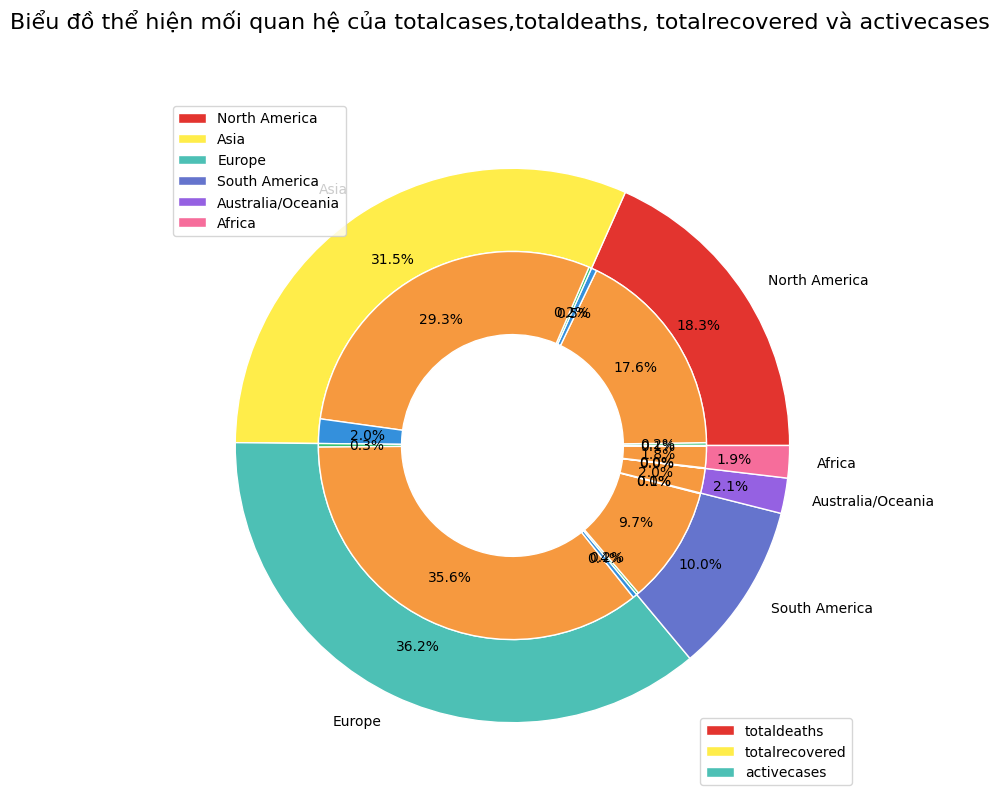

In [231]:
fig, ax = plt.subplots(figsize = (10,9))
size = 0.3
labels = ['totaldeaths', 'totalrecovered', 'activecases']
mycolor1 = ['#e3342f','#ffed4a','#4dc0b5','#6574cd','#9561e2','#f66d9b']
ax.pie(df['totalcases'][:6],labels=df['continent'][:6], radius=1,
       autopct='%1.1f%%', pctdistance=0.8,
       wedgeprops=dict(width=size, edgecolor='w'),colors=mycolor1)

mycolor2 = ['#38c172','#f6993f','#3490dc',]
ax.pie(test, radius=1-size, autopct='%1.1f%%', pctdistance=0.75,
       wedgeprops=dict(width=size, edgecolor='w'), colors=mycolor2)

labels_2 = list (df['continent'].loc[:5])

first_legend = plt.legend(labels_2,loc = 2)
ax = plt.gca().add_artist(first_legend)
second_legend = plt.legend(labels,loc = 4,ncol=1)
fig.suptitle('Biểu đồ thể hiện mối quan hệ của totalcases,totaldeaths, totalrecovered và activecases', fontsize=16)

ax.set()
plt.show()

Từ biểu đồ donutchart, ta thấy được:
- Ở vòng tròn thứ nhất, tức là vòng ngoài cùng, đó là totalcases của các khu vực. Trong đó các khu vực Asia, Europe chiếm tỉ trọng khá cao, cụ thể lần lượt là 31.5% và 36.2%, đồng nghĩa là các nước trong khu vực này sẽ nhiều tổng ca bao gồm ca nhiễm, ca hồi phục và ca tử vong. Tiếp theo, các khu vực chiếm tỉ trọng tương đối là South America và North America. Cuối cùng là các nước ở khu vực Africa và Australia/Oceania, chiểm tỉ trọng thấp nhất trong biểu, cũng có thể xem là tổng số ca ít nhất so với các khu vực khác.
- Để có thể hiểu rõ hơn từng khu vực, ta có thể xem vòng tròn thứ hai, tức là vòng tròn trong cùng, mỗi khu vực sẽ bao gồm totaldeaths, totalrecovered, activecases để thể tỉ trọng trong từng khu vực. Như ta thấy thì số ca hồi phục chiểm nhiều hơn so với số ca nhiễm và số ca tử vong. Cũng chính vì điều đó đã cho ta thấy được y tế được cải thiện rất nhiều so với những năm trước, Chính phủ đã quan tâm tới sức khoẻ của người dân nhiều hơn hoặc là đã tìm ra các phương pháp cứu chữa để làm giảm số ca tử vong.


## 6.5. Câu hỏi số 5 <a name = "section6_5"></a>
[Quay về mục lục](#TOC)

---

# **7. Đôi điều về đồ án** <a name = "section7"></a>
[Quay về mục lục](#TOC)

---

# **8. Nguồn tham khảo** <a name = "section8"></a>
[Quay về mục lục](#TOC)